In [1]:
# Connecting to the Workspace
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws)

Workspace.create(name='aml-workspace', subscription_id='3571f8dc-3527-4993-9d2b-ac0812d807fd', resource_group='aml-resources')


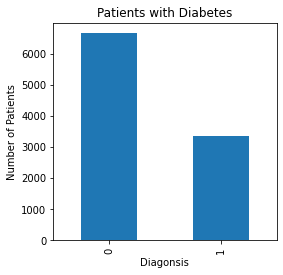

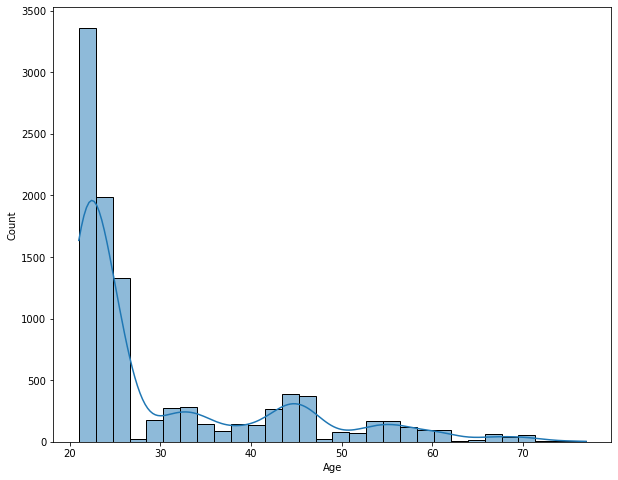

In [2]:
from azureml.core import Experiment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating an Experiment
experiment = Experiment(workspace = ws, name = 'First-Experiment')

# Start experiment from here
run = experiment.start_logging()

# Script File
dataset = pd.read_csv('mslearn-dp100/data/diabetes.csv')

# Performing different types of logs 
    # run.log()
number_of_rows = dataset.shape[0]
run.log(name = 'Rows', value = number_of_rows, description = "Total number of records in our dataset")

number_of_columns = dataset.shape[1]
run.log(name = 'Features', value = number_of_columns, description = "Total number of Features in our dataset")

    # run.log_image()
target_values = dataset['Diabetic'].value_counts()

# Configuring fig and ax for figure -> Matplot
fig_target = plt.figure(figsize = (4, 4))
ax = fig_target.gca() # AxesSubplot(0.125,0.125;0.775x0.755)

target_values.plot.bar(ax = ax)
ax.set_title('Patients with Diabetes')
ax.set_xlabel('Diagonsis')
ax.set_ylabel('Number of Patients')

# plt.show()
run.log_image(name = 'Target Categories', plot = fig_target, description = "Shows the number of people having diabetes and not.")

# Configuring fig and ax for figure -> Seaborn
fig = plt.figure(figsize = (10, 8))
sns.histplot(data = dataset['Age'], bins = 30, kde=True)
# plt.show()
run.log_image(name = 'Age Distribution', plot = fig, description = 'Age distribution is right skewed')


    # log_list
unique_bmi_values = list(dataset.BMI.unique())[: 25]
run.log_list('List of BMI values', unique_bmi_values)

    # log_row
stats = dataset.describe().to_dict()

for column in stats:
    keys = list(stats[column].keys())
    values = list(stats[column].values())

    for index in range(len(keys)):
        run.log_row(column, stat = keys[index], value = values[index])

# End the Experiment
run.complete()


In [3]:
from azureml.widgets import RunDetails

RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [4]:
import json

# Get Logged Metrics
metrics = run.get_metrics()

print(json.dumps(metrics, indent = 2))

{
  "Rows": 10000,
  "Features": 10,
  "Target Categories": "aml://artifactId/ExperimentRun/dcid.61cf3a0c-3326-4a93-a651-09827ba94f32/Target Categories_1659599315.png",
  "Age Distribution": "aml://artifactId/ExperimentRun/dcid.61cf3a0c-3326-4a93-a651-09827ba94f32/Age Distribution_1659599316.png",
  "SerumInsulin": {
    "stat": [
      "count",
      "mean",
      "std",
      "min",
      "25%",
      "50%",
      "75%",
      "max"
    ],
    "value": [
      10000.0,
      139.2436,
      133.77791937465278,
      14.0,
      39.0,
      85.0,
      197.0,
      796.0
    ]
  },
  "BMI": {
    "stat": [
      "count",
      "mean",
      "std",
      "min",
      "25%",
      "50%",
      "75%",
      "max"
    ],
    "value": [
      10000.0,
      31.56702174359113,
      9.804365693559113,
      18.20080735,
      21.247426835,
      31.922420785,
      39.3289214475,
      56.03462763
    ]
  },
  "List of BMI values": [
    43.50972593,
    21.24057571,
    41.51152348,
    29